<a href="https://colab.research.google.com/github/sorentys/MachineLearning/blob/main/Machine_Learning_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 10: Machine Learning with Scikit-Learn

In [1]:
# Dependencies for the lab
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

## Introduction:
Introduction:
Scikit-learn is a very popular library for machine learning in Python. You can think of it as an add-on to scipy/numpy with a very large number of implementations of common machine learning algorithms.

In general, the scikit-learn API can help you accomplish the following tasks:
* Preprocessing
* Dimensionality Reduction
* Clustering
* Classification
* Regression

Lab Objective:

Learn and become proficient at using different machine learning algorithms in the Scikit-Learn tool set.

For this lab you will need to create a number of plots where each point is given a different color. You can do this using matplotlib. The basic idea is you can create an array of colors and an array of indices

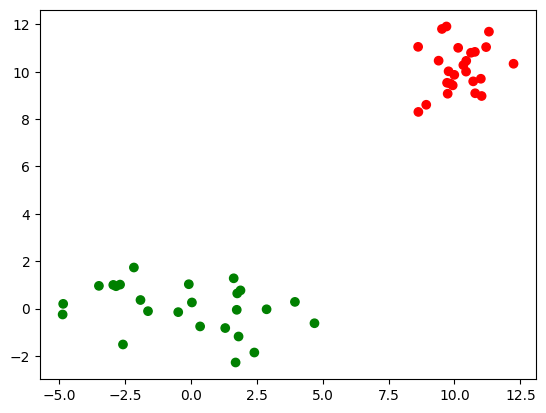

In [2]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

n = 25

x1 = np.random.multivariate_normal([10, 10], cov=np.eye(2), size=n)
x1_idx = np.zeros(n, dtype=int)

x2 = np.random.multivariate_normal([0, 0], cov=np.array([[5, 0], [0, 1]]), size=n)
x2_idx = np.ones(n, dtype=int)

X = np.concatenate([x1, x2], axis=0)
X_idx = np.concatenate([x1_idx, x2_idx])

# create the plot and index into the colors array
plt.scatter(X[:, 0], X[:, 1], c=colors[X_idx])

## Exercise 1: Clusters!

In this exercise, you will train three different clustering algorithms on three different datasets. 

### Algorithms:
#### K-means 
* [Overview](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

#### DBScan: 

* [Overview](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

#### GMM: 

* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

After reading the above documentation (You can skim it) attempt to explain to me like I'm five, what these algorithms are doing:
 

Explain how K-Means works?

A K-means model finds clusters by looking at the distance between points and and determining if the points are close enough to be in a group together. K-means aslo finds the center of what it thinks is a cluster.

Explain how DBScan works?

DBscan works by finding the distance from one point to its nearest point. This way it can see if the cluster follows a certain shape instead of points in a cluster all being close to each other. 

Explain how GMM works?

GMM stands for Gaussian Mixture Model. GMM uses Gaussian distributions (density functions) to find clusters of data.

#### Datasets:
We will generate three toy datasets using the scikit-learn api, which you can do with the following code:

In [3]:
from sklearn import datasets
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

This generates three datasets, `noisy_circles`, `noisy_moons`, and `blobs`

Your Task: 
* We want you to train each clustering algorithm on each dataset (you should have a total of 9 plots).
* For each dataset/algorithm, plot the points. Color the points using the cluster the belong to

In [4]:
#define plot functions
seed = np.random.seed(0)
def kmeans_plot(dataset):
  scalar = StandardScaler()
  scaled_data = scalar.fit_transform(dataset)

  kmeans = KMeans(n_clusters=3, random_state=seed)
  kmeans = kmeans.fit(scaled_data)
  
  plot = plt.scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans.labels_)
  plt.show(plot)

def dbscan_plot(dataset):
  scalar = StandardScaler()
  scaled_data = scalar.fit_transform(dataset)

  dbscan = DBSCAN(eps=0.2, min_samples=2).fit(scaled_data)

  plot = plt.scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=dbscan.labels_)
  plt.show(plot)

def gmm_plot(dataset):
  scalar = StandardScaler()
  scaled_data = scalar.fit_transform(dataset)

  gmm = GaussianMixture(n_components=3, random_state=seed).fit(scaled_data)
  gmm = gmm.predict(scaled_data)
  plot = plt.scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=gmm)
  plt.show(plot)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


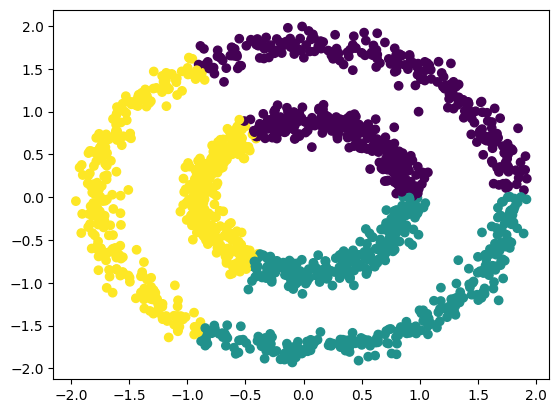

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


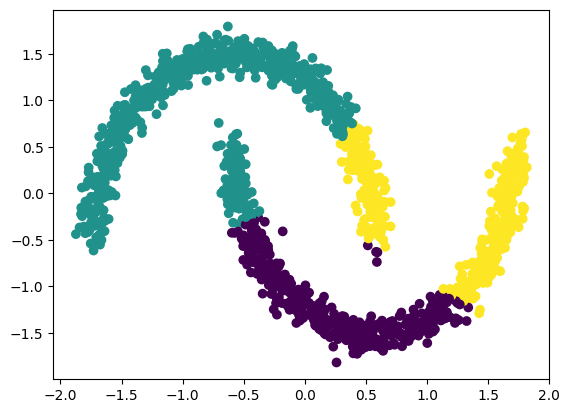

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


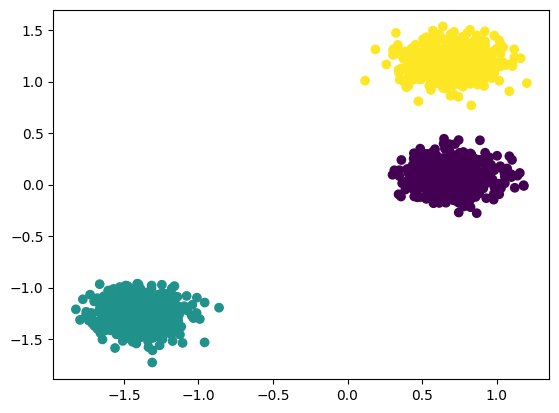

In [5]:
#Enter the code for exercise 1 here
#k-means
kmeans_plot(noisy_circles)

kmeans_plot(noisy_moons)

kmeans_plot(blobs)

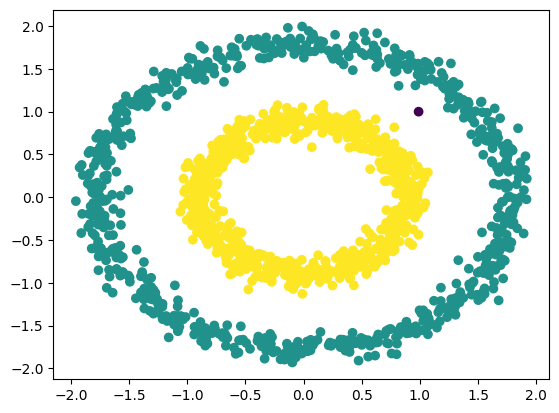

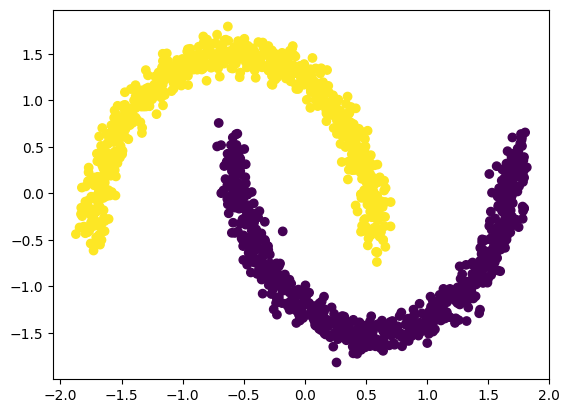

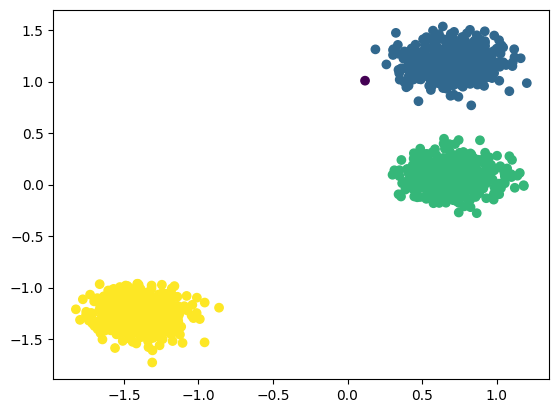

In [6]:
#DBscan

dbscan_plot(noisy_circles)

dbscan_plot(noisy_moons)

dbscan_plot(blobs)

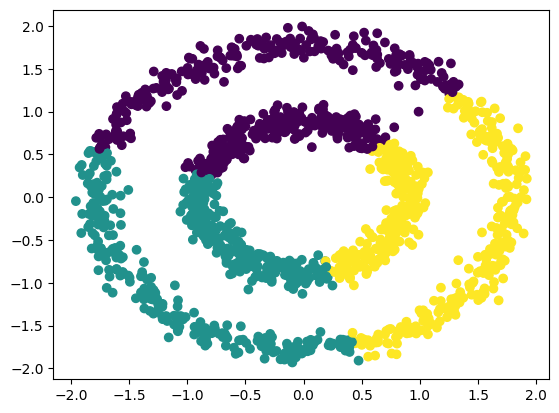

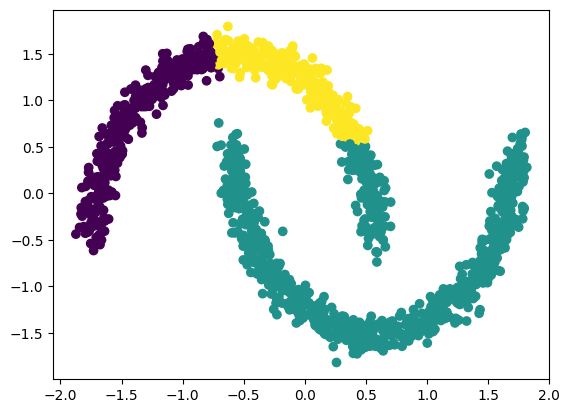

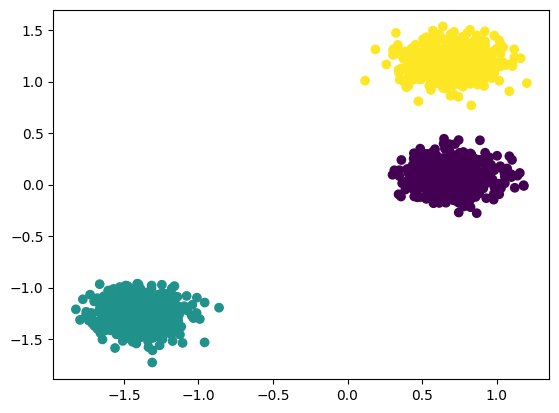

In [7]:
#Guassian Mixture
gmm_plot(noisy_circles)

gmm_plot(noisy_moons)

gmm_plot(blobs)

## Exercise 2: Flower Power Returns


In the previous exercise we looked simple datasets with 2 dimensions (features). In real life, we often have many more variables than. Clustering algorithms can also be applied to higher dimensional data. For this exercise train k-means on the Iris dataset, which has 4 dimensions (features). This is difficult visualize so we will also apply a dimensionality technique to the data to reduce to 2-D strictly to create a plot.

### Dataset
Download the iris dataset and cast to a numpy array

In [8]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset(dataname='iris', package='datasets').data
X = df.iloc[:, :4].values

We know the iris dataset has three classes `['setosa', 'versicolor', 'virginica']`

Your Task: 
* Train K-means on the iris dataset with 3 clusters

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
fit = kmeans.fit(X)
clusters = fit.predict(X)
# your code goes here
# clusters = get predicted clusters indices

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now let’s visualize the clusters by reducing the feature space to 2-D. This will allow us to create a plot. We will use T-distributed Stochastic Neighbor Embedding [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

Your Task:
* Create a plot using X_reduced, where each point is colored according to its cluster id.

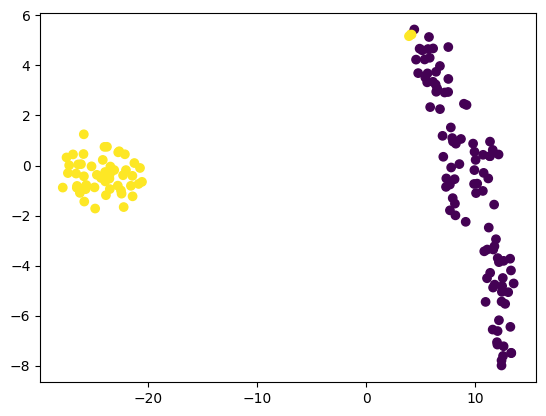

In [11]:
plot = plt.scatter(x=X_reduced[:,0], y=X_reduced[:,1], c=kmeans.labels_)
plt.show(plot)
#Enter your code for the X_reduced plot here.


Comment on your observations. Were we successfully able to group samples together without labels?

By tweaking my kmeans clusters I was able to fit the sample groups quite well without labels.

## Exercise 3: Split the Data

Use the train_test_split() function in sklearn (sklearn.model_selection.train_test_split ) to split the iris data set. Report the number of samples in both the train and test set.

In [12]:
from sklearn.model_selection import train_test_split
split_data = train_test_split(X)
print(len(split_data[0]))
print(len(split_data[1]))
#Split the dataset here

112
38


What is the number of samples in the train set?

112

What is the number of samples in the test set?

38

## Exercise 4: K Nearest Neighbors

Your Task: 
* Train a K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier ) on the iris data.

* Train your KNN when the n_neighbors parameter is 5. Report your train accuracy and test accuracy

* Perform a grid search over the parameter n_neighbors over the range 1-20:

* For each value of n_neighbors, fit a KNN and record your train and test accuracy

* Create a plot showing the test/train accuracy over the n_neighbors



0.9821428571428571
0.9736842105263158


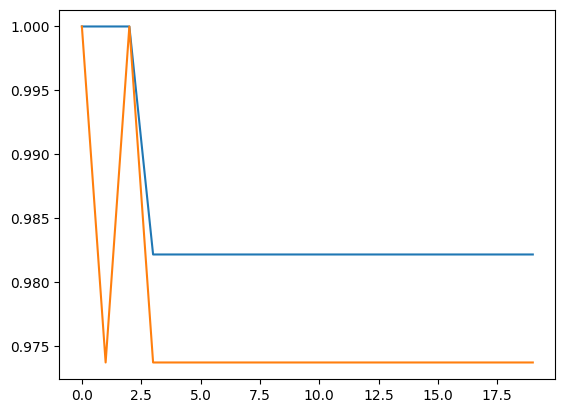

In [13]:
# Enter your code for Exercise 4 here
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train = split_data[0]
X_test = split_data[1]

Y_train = fit.predict(X_train)
Y_test = fit.predict(X_test)

accuracy_train = []
accuracy_test = []

for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn = knn.fit(X_train, Y_train)
  train = metrics.accuracy_score(Y_train, knn.predict(X_train))
  test = metrics.accuracy_score(Y_test, knn.predict(X_test))
  accuracy_train.append(train)
  accuracy_test.append(test)

print(accuracy_train[4])
print(accuracy_test[4])

plt.clf()
plt.plot(accuracy_train)
plt.plot(accuracy_test)

What is your train accuracy and test accuracy for when the n_neighbors parameter is 5

0.9821428571428571



Discuss what you learn. How does train and test accuracy behave as you change the number of neighbors?

0.9736842105263158